In [13]:
#import dependencies
import pandas as pdimport matplotlib
from matplotlib import pyplot

Downloading: 100%|██████████| 871994/871994 [00:02<00:00, 375906.04rows/s]


## RUNNING QUERIES

In [ ]:
%%bigquery trips_weekday

SELECT *,
        EXTRACT(HOUR FROM start_date) AS start_hour
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE EXTRACT(DAYOFWEEK FROM start_date) != 7
        and EXTRACT(DAYOFWEEK FROM start_date) != 1
    ORDER BY start_date ASC

In [47]:
%%bigquery trips_subscriber

SELECT *,
        EXTRACT(DAYOFWEEK FROM start_date) AS dow_int,
       CASE EXTRACT(DAYOFWEEK FROM start_date)
           WHEN 1 THEN "Sunday"
           WHEN 2 THEN "Monday"
           WHEN 3 THEN "Tuesday"
           WHEN 4 THEN "Wednesday"
           WHEN 5 THEN "Thursday"
           WHEN 6 THEN "Friday"
           WHEN 7 THEN "Saturday"
           END AS dow_str,
       CASE 
           WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) THEN "Weekend"
           ELSE "Weekday"
           END AS dow_weekday,
       EXTRACT(HOUR FROM start_date) AS start_hour
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE subscriber_type ='Subscriber' 
    ORDER BY start_date ASC

Downloading: 100%|██████████| 846839/846839 [00:02<00:00, 422549.98rows/s]


In [48]:
%%bigquery trips_customer

SELECT *,
        EXTRACT(DAYOFWEEK FROM start_date) AS dow_int,
       CASE EXTRACT(DAYOFWEEK FROM start_date)
           WHEN 1 THEN "Sunday"
           WHEN 2 THEN "Monday"
           WHEN 3 THEN "Tuesday"
           WHEN 4 THEN "Wednesday"
           WHEN 5 THEN "Thursday"
           WHEN 6 THEN "Friday"
           WHEN 7 THEN "Saturday"
           END AS dow_str,
       CASE 
           WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) THEN "Weekend"
           ELSE "Weekday"
           END AS dow_weekday,
       EXTRACT(HOUR FROM start_date) AS start_hour
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE subscriber_type ='Customer' 
    ORDER BY start_date ASC

Downloading: 100%|██████████| 136809/136809 [00:03<00:00, 42766.80rows/s]


In [3]:
%%bigquery trips_weekday_morning

SELECT *
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE CAST(start_date as time) >= '6:30:00' 
        and CAST(end_date as time) <= '10:00:00'
        and EXTRACT(DAYOFWEEK FROM start_date) != 7
        and EXTRACT(DAYOFWEEK FROM start_date) != 1
    ORDER BY start_date ASC

Downloading: 100%|██████████| 290784/290784 [00:01<00:00, 160784.10rows/s]


In [22]:
%%bigquery trips_weekday_afternoon

SELECT *
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE CAST(start_date as time) >= '15:00:00' 
    and CAST(end_date as time) <= '19:00:00'
        and EXTRACT(DAYOFWEEK FROM start_date) != 7
        and EXTRACT(DAYOFWEEK FROM start_date) != 1
    ORDER BY start_date ASC

Downloading: 100%|██████████| 305121/305121 [00:01<00:00, 198844.08rows/s]


In [5]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2013-01-01', end='2016-12-31')

In [23]:
non_holiday_weekdays = trips_weekday[trips_weekday['start_date'].dt.date.isin(holidays) == False]
non_holiday_weekday_afternoon = trips_weekday_afternoon[trips_weekday_afternoon['start_date'].dt.date.isin(holidays) == False]
non_holiday_weekday_morning = trips_weekday_morning[trips_weekday_morning['start_date'].dt.date.isin(holidays) == False]


/opt/conda/lib/python3.7/site-packages/pandas/core/algorithms.py:523: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return f(comps, values)


## DEFINING COMMUTE TIMES

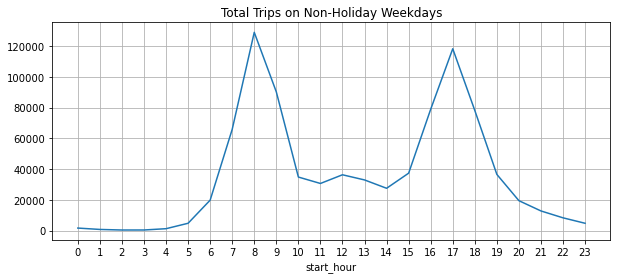

In [46]:
trips_by_hr = pd.DataFrame(non_holiday_weekdays.groupby(['start_hour']).size())
trips_by_hr = trips_by_hr.rename(columns = {0:'Number_of_Trips'})
line_plot = trips_by_hr.plot.line(y = 'Number_of_Trips', figsize = (10,4), grid = True, title='Total Trips on Non-Holiday Weekdays' , legend = False, xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])


**Based on this analysis we know to define "commute times" as 6:30-10:00 and 15:00-19:00 on non-holiday weekdays, since there were more than 4,000 trips an hour during these intervals.**

## MOST POPULAR COMMUTER TRIPS

In [25]:
non_holiday_weekday_morning['Route Name'] = non_holiday_weekday_morning['start_station_name']+'--'+non_holiday_weekday_morning['end_station_name']
non_holiday_weekday_afternoon['Route Name'] = non_holiday_weekday_afternoon['start_station_name']+'--'+non_holiday_weekday_afternoon['end_station_name']
morning_commutes = pd.DataFrame(non_holiday_weekday_morning.groupby(['Route Name']).size())
afternoon_commutes = pd.DataFrame(non_holiday_weekday_afternoon.groupby(['Route Name']).size())
morning_commutes = morning_commutes.rename(columns = {0:'Number of Trips'})
afternoon_commutes= afternoon_commutes.rename(columns = {0:'Number of Trips'})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
top_morning_commutes = morning_commutes.sort_values(['Number of Trips'],ascending=False).head(5)
top_morning_commutes.style.set_caption("Most Popular Commuter Trips (Morning)").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '20px')
    ]
}])

,Number of Trips
Route Name,
Harry Bridges Plaza (Ferry Building)--2nd at Townsend,4523
Steuart at Market--2nd at Townsend,3720
San Francisco Caltrain (Townsend at 4th)--Temporary Transbay Terminal (Howard at Beale),3592
San Francisco Caltrain (Townsend at 4th)--Embarcadero at Folsom,3529
San Francisco Caltrain 2 (330 Townsend)--Townsend at 7th,3527


In [105]:
top_afternoon_commutes = afternoon_commutes.sort_values(['Number of Trips'],ascending=False).head(5)
top_afternoon_commutes.style.set_caption("Most Popular Commuter Trips (Afternoon)").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '20px')
    ]
}])

,Number of Trips
Route Name,
2nd at Townsend--Harry Bridges Plaza (Ferry Building),4862
Embarcadero at Folsom--San Francisco Caltrain (Townsend at 4th),4748
Embarcadero at Sansome--Steuart at Market,4112
Temporary Transbay Terminal (Howard at Beale)--San Francisco Caltrain (Townsend at 4th),3995
Steuart at Market--San Francisco Caltrain (Townsend at 4th),3890


## ANALYSIS OF SUBSCRIBERS VS. CUSTOMERS

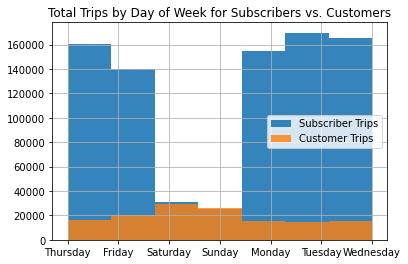

In [74]:
pyplot.hist(trips_subscriber.dow_str, bins = 7, alpha = 0.9, label='Subscriber Trips')
pyplot.hist(trips_customer.dow_str, bins = 7, alpha = 0.8, label='Customer Trips')
pyplot.legend(loc='center right')
pyplot.grid()
pyplot.title('Total Trips by Day of Week for Subscribers vs. Customers', font-size)
pyplot.show()


**Subscribers are much more active on Weekdays than they are on Weekends. The opposite is true for Customers, whose activity peaks on Saturday and Sunday**

In [77]:
trips_subscriber['time_minutes'] = trips_subscriber['duration_sec']/60
trips_customer['time_minutes'] = trips_customer['duration_sec']/60

In [98]:
subscriber_trips_stats = trips_subscriber.groupby('dow_weekday')['time_minutes', 'start_hour'].median()
subscriber_trips_stats.style.set_caption("Median Duration and Start Hour of a Subscriber's Trip").set_table_styles([{
    'selector': 'caption',
    'props': [("text-align", "left"),
        ('color', 'black'),
        ('font-size', '14px')
    ]
}])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,time_minutes,start_hour
dow_weekday,,
Weekday,8.016667,13.000000
Weekend,8.150000,14.000000


In [103]:
customer_trip_stats = trips_customer.groupby('dow_weekday')['time_minutes', 'start_hour'].median()
customer_trip_stats.style.set_caption("Median Duration and Start Hour of a Customer's Trip").set_table_styles([{
    'selector': 'caption',
    'props': [("text-align", "left"),
        ('color', 'black'),
        ('font-size', '14px')
    ]
}])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,time_minutes,start_hour
dow_weekday,,
Weekday,16.916667,14.000000
Weekend,21.950000,14.000000


**On average both subscriber and customer users take longer trips on Weekends, though this phenomenon is much more significant among customers. The average trip start times are consistent across both groups on both weekdays and weekends.**

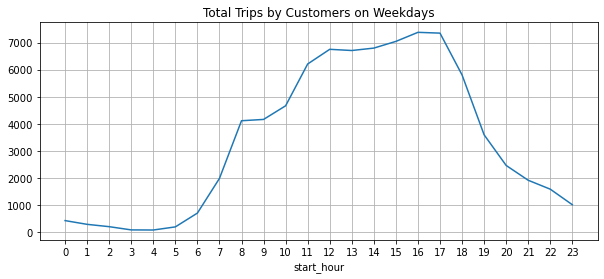

In [91]:
trips_by_hr_customer = pd.DataFrame(trips_customer[trips_customer['dow_weekday'] == 'Weekday'].groupby(['start_hour']).size())
trips_by_hr_customer = trips_by_hr_customer.rename(columns = {0:'Number_of_Trips'})
line_plot = trips_by_hr_customer.plot.line(y = 'Number_of_Trips', figsize = (10,4), grid = True, title='Total Trips by Customers on Weekdays' , legend = False, xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])


**Unlike subscribers, whose weekday trip activity peaks during morning and afternoon commute hours; weekday customer activity is much more evenly spread out. Customer activity picks up in the morning, remains high between 11:00 and 18:00 and then drops in the evening. One can infer that while the majority of subscribers are frequent commuters, with their own daily routes, customers are a much more heterogenous group that doesn't use the bike service as regularly.**

## RECOMMENDATIONS FOR OFFERS

- **Based on our findings, there is a ton of untapped potential for increasing the number of subscriber trips on weekends. The number of subscriber trips on a Saturday or Sunday is around only 18.5% of the number of trips on a weekday.**
- **The median duration of a weekend trip is significantly longer than that of a weekday trip, so increasing the number of weekend trips will have a greater impact on revenue**
- **One offer I would recommend is some sort of promotional discount on weekend trips for subscribers, this approach would serve a dual purpose:**
    - **it would incentivize the thousands of subscribers who use the service every weekday to commute, to take advantage of the discount and begin the habit of biking for pleasure on weekends.**
    - **it might attract ordinary customers (who tend to be most active on weekends) to enroll in the subscription program for the weekend benefits.**
